In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [12.0 , 8.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

In [3]:
df = pd.read_csv('../../../data/miner/09517617000153_3.csv')

In [4]:
df.head(10)

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero
0,2019-01-02,1001,CREME DENTAL CLOSEUP TRIPLE 70G MENTA,2.79,1.0,0.00,0.0,1,0.0
1,2019-01-02,10012802,MASTRUZ HORTA VERDE UN,19.90,10.0,3.98,2.0,9,0.0
2,2019-01-02,10022,LIXA UNHA M BONI 6 UND,2.59,1.0,0.00,0.0,1,0.0
3,2019-01-02,100328,POLVILHO YOKI 500G AZEDO,9.49,1.0,0.00,0.0,1,0.0
4,2019-01-02,100335,SHAMPOO PROCAO 500ML PELOS CLAROS,7.99,1.0,0.00,0.0,1,0.0
5,2019-01-02,100366,SHAMPOO PROCAO PELO ESCUROS 500ML,15.98,2.0,0.00,0.0,2,0.0
6,2019-01-02,10043,DEFRIZANTE CHEVEUX 400 ML OLEO ARGAN BLINDADO,19.99,1.0,19.99,1.0,1,0.0
7,2019-01-02,10044,DEFRIZANTE CHEVEUX 400 ML OLEO COCO,19.99,1.0,0.00,0.0,1,0.0
8,2019-01-02,100496,CITRUS INDAIA 2L LARANJA,55.90,10.0,5.59,1.0,10,0.0
9,2019-01-02,10052,PRESERVATIVO BLOWTEX LUBRIFICADO LV 6 PG 4,5.89,1.0,0.00,0.0,1,0.0


In [5]:
df.index = df['data']
df.sort_index(inplace=True)
df['data'] = df['data'].astype('datetime64[ns]')

In [6]:
df_qtt = df['quantidade'].groupby(df['produtoId']).sum()

In [7]:
df_qtt.sort_values(ascending=False)

produtoId
128568    99462.0
138352    77363.0
66846     72890.0
149402    72827.0
139533    68204.0
           ...   
6466          0.0
17411         0.0
2415          0.0
2409          0.0
1397          0.0
Name: quantidade, Length: 16685, dtype: float64

In [8]:
top10prods = list(df_qtt.sort_values(ascending=False)[:10].index)

In [9]:
# df_prod = df[df['produtoId'] == 128568]

In [10]:
def plot_history_quantity_prod(id_prod):
    df_prod = df[df['produtoId'] == id_prod]
    
#     df_prod['Mean'] = (df.High + df.Low )/2.0
    
#     decomposition = seasonal_decompose(df.Mean.values, freq=365) 
#     trace1 = go.Scatter(
#         x = df.Date,y = decomposition.trend,
#         name = 'Trend',mode='line'
#     )
#     trace2 = go.Scatter(
#         x = df.Date,y = decomposition.seasonal,
#         name = 'Seasonal',mode='line'
#     )
#     trace3 = go.Scatter(
#         x = df.Date,y = decomposition.resid,
#         name = 'Residual',mode='line'
#     )
#     trace4 = go.Scatter(
#         x = df.Date,y = df.Mean,
#         name = 'Mean Stock Value',mode='line'
#     )
    
    title = "Histórico de quantidade diária de vendas produto id:{}".format(str(id_prod))
    
    
    ax = df_prod['quantidade'].groupby(df_prod['data'].dt.to_period('D')).sum().plot(
    label = 'Acúmulo',figsize=(20,7), 
    color = "royalblue", legend = True, title = title)
    # marker = "8", markersize =2 
    
    ax.set_xlabel('Semanas')
    ax.set_ylabel('Quantidade vendida')
    ax.grid()

In [11]:
top10prods

[128568, 138352, 66846, 149402, 139533, 40594, 59909, 60820, 7245, 138307]

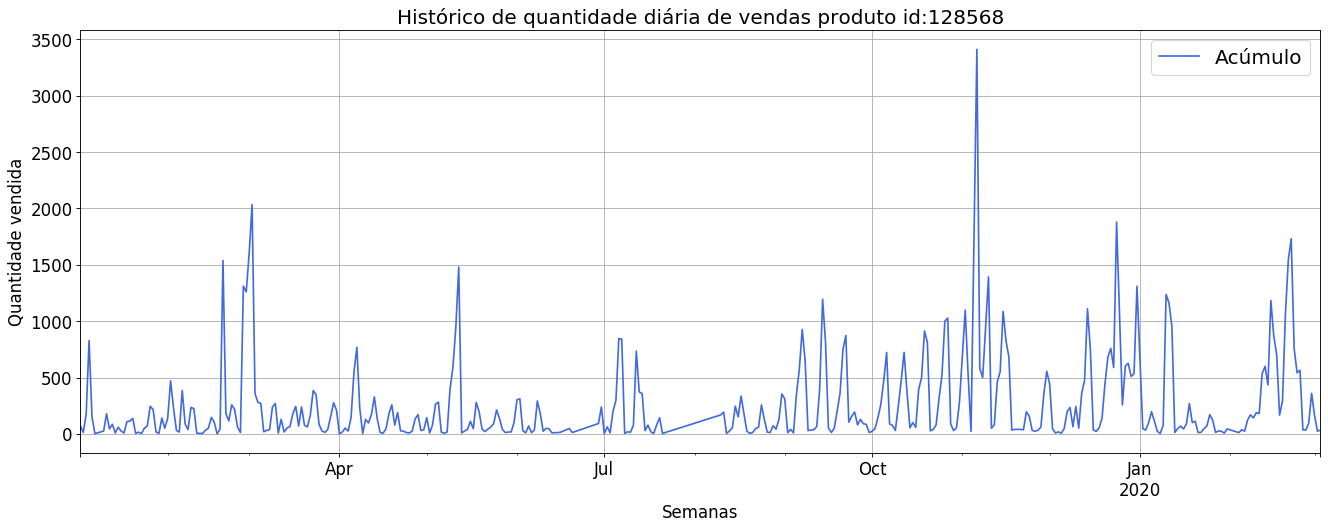

In [12]:
plot_history_quantity_prod(128568)

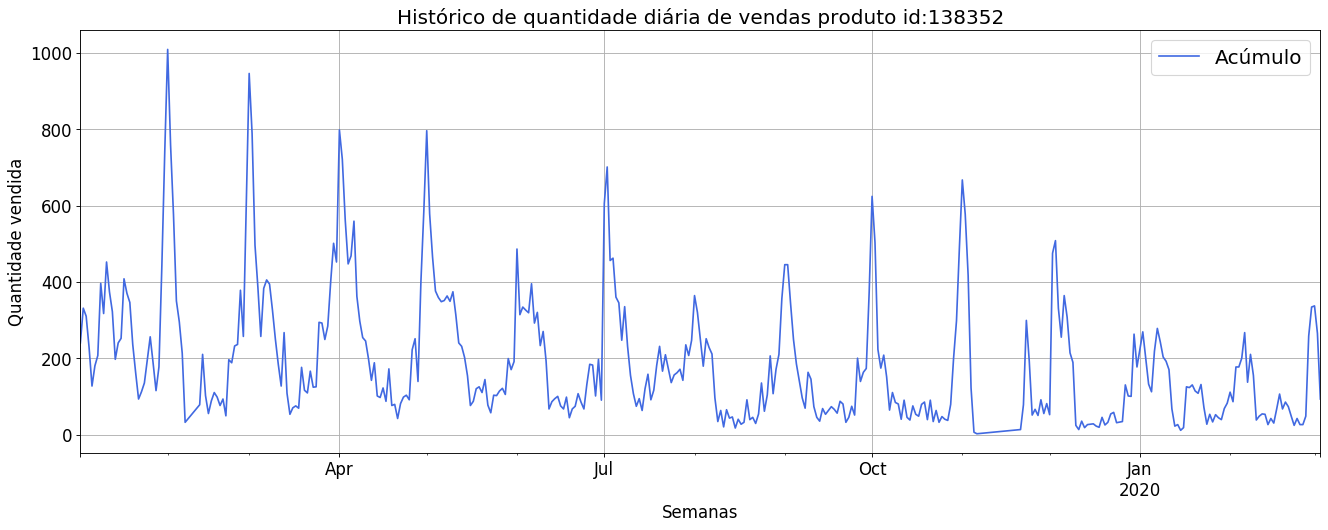

In [13]:
plot_history_quantity_prod(138352)

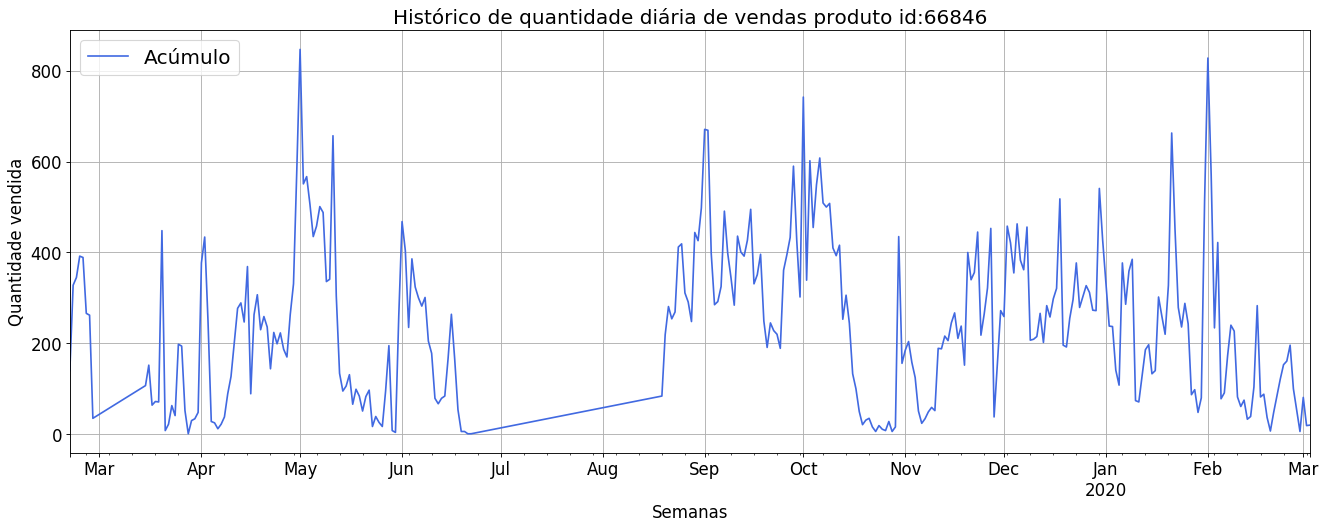

In [14]:
plot_history_quantity_prod(66846)

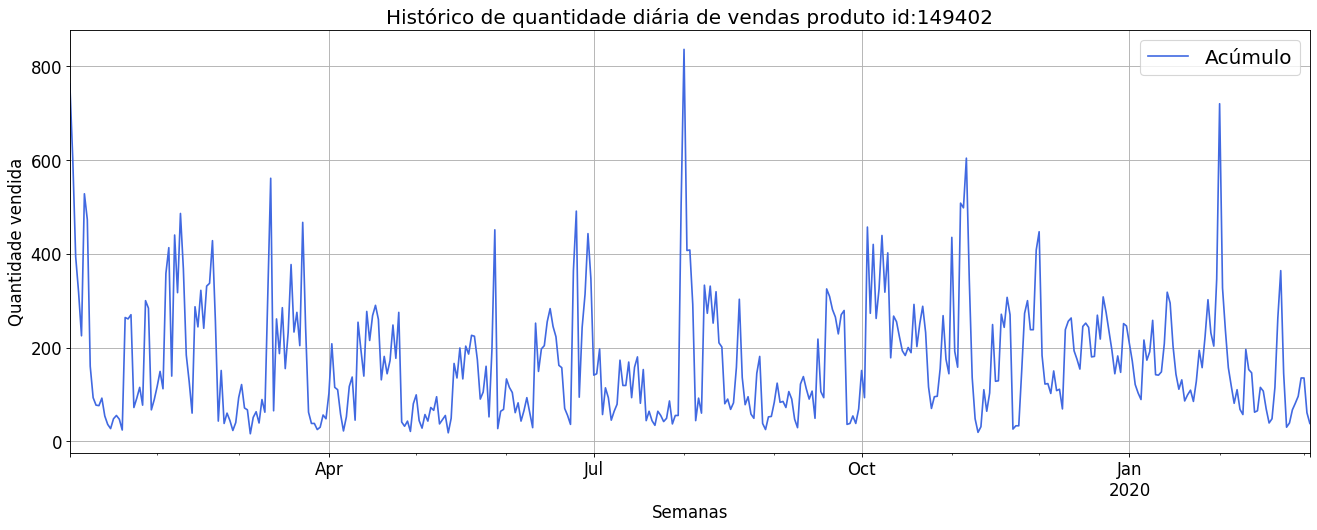

In [15]:
plot_history_quantity_prod(149402)

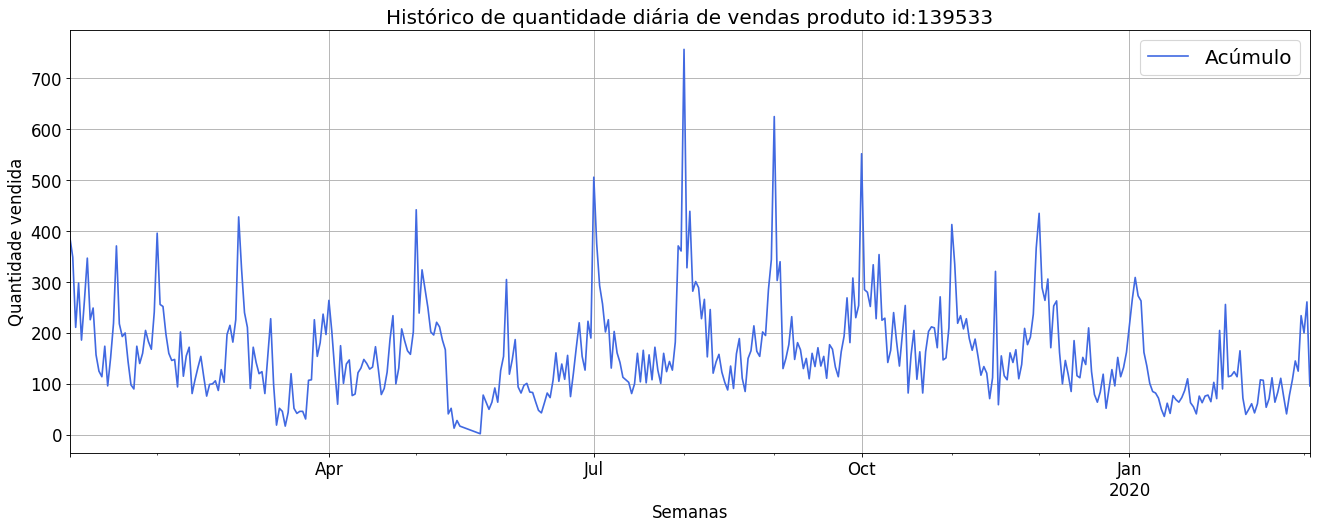

In [16]:
plot_history_quantity_prod(139533)

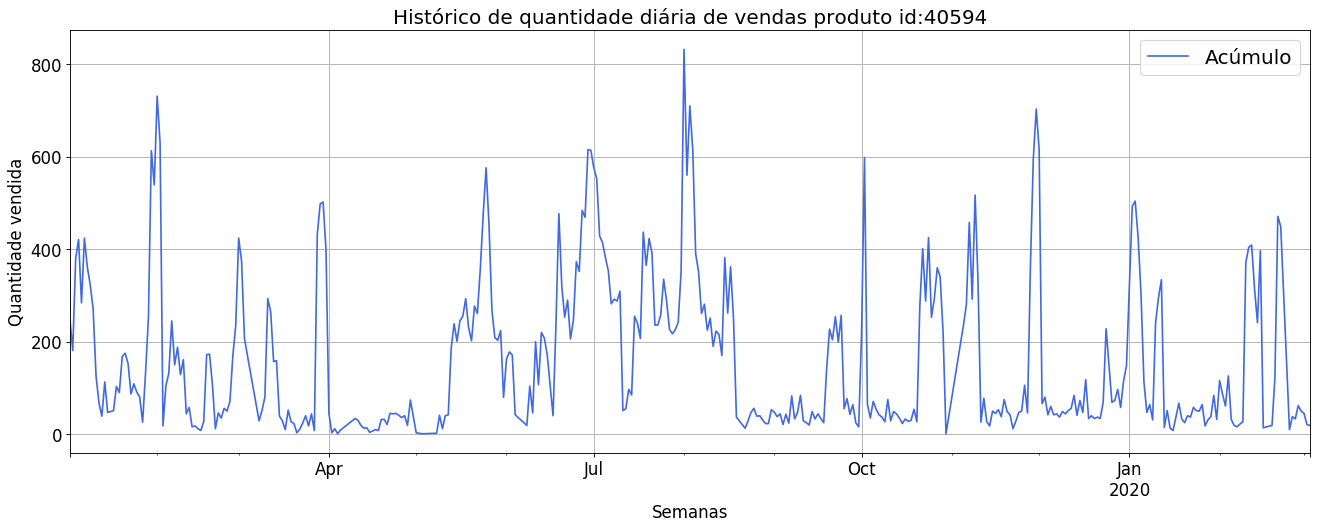

In [17]:
plot_history_quantity_prod(40594)

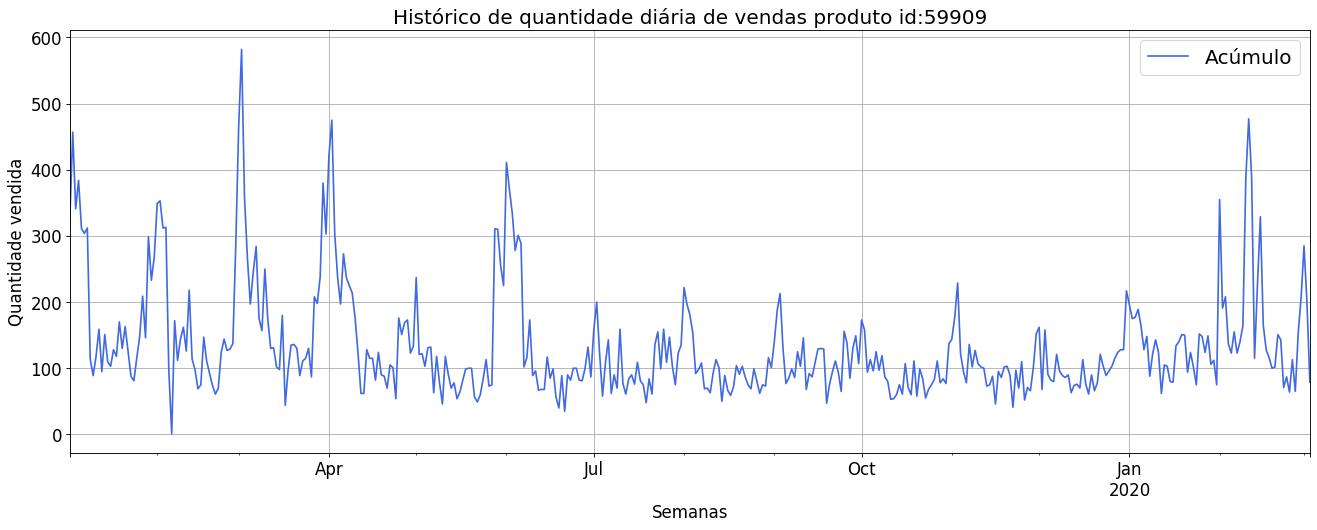

In [18]:
plot_history_quantity_prod(59909)

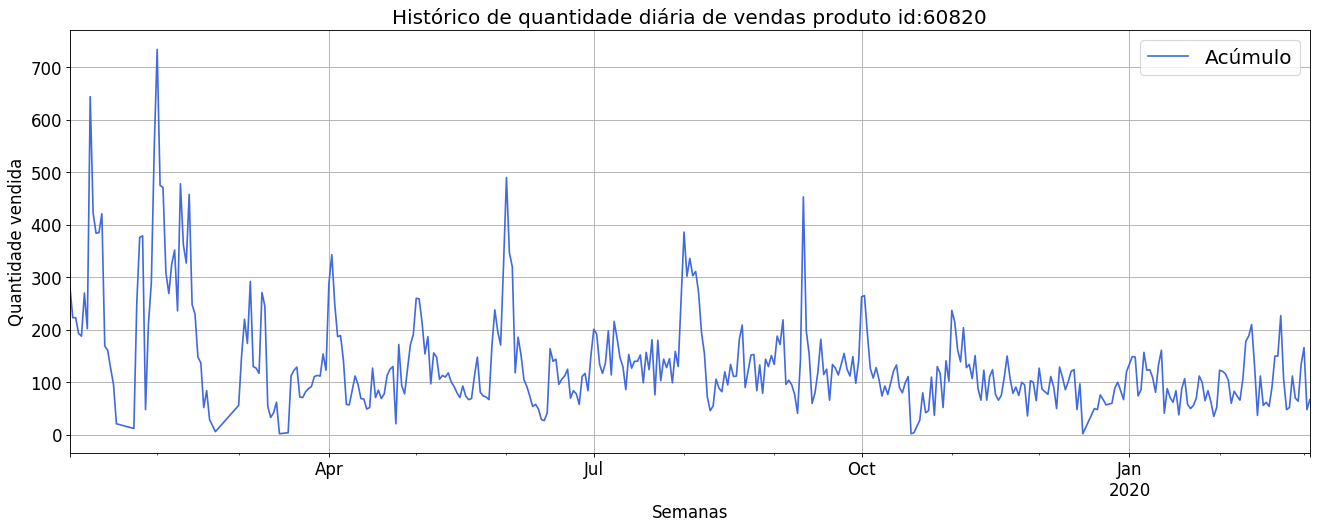

In [19]:
plot_history_quantity_prod(60820)

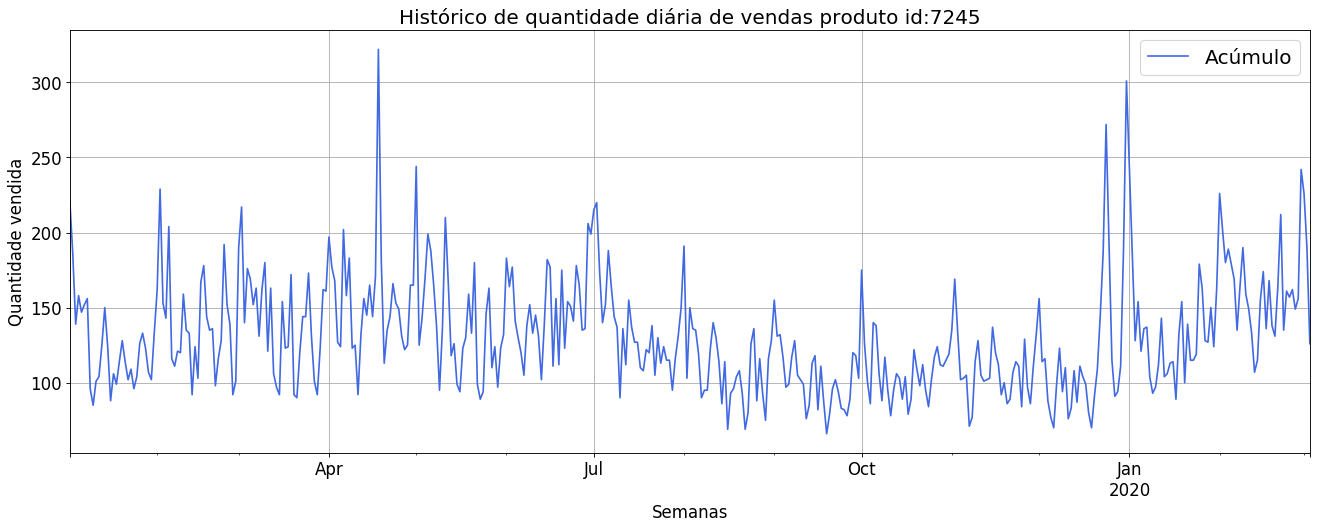

In [20]:
plot_history_quantity_prod(7245)

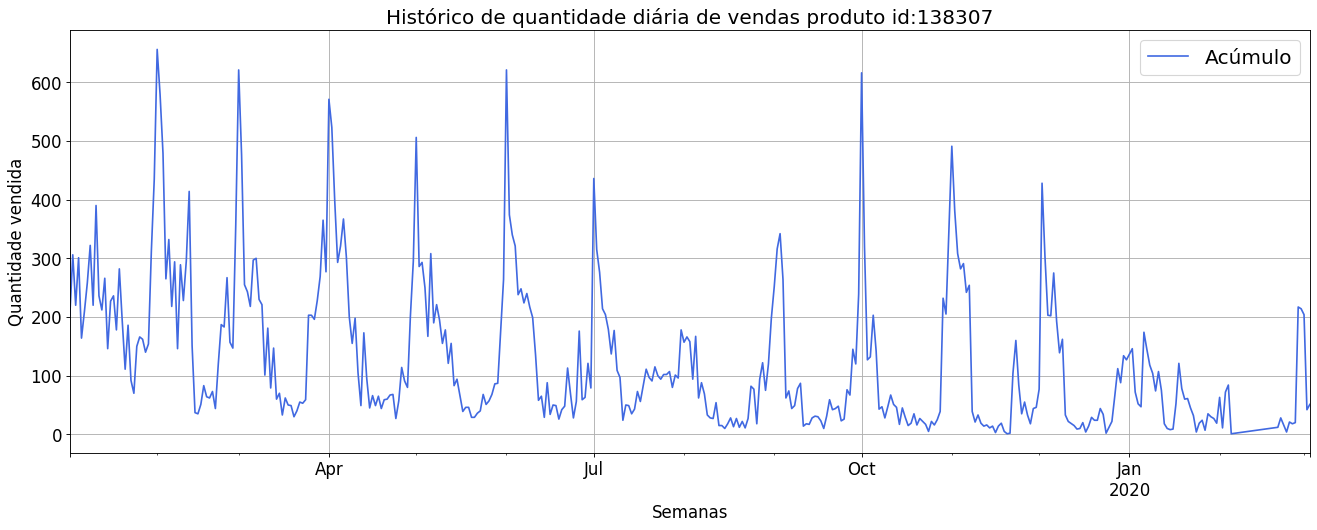

In [21]:
plot_history_quantity_prod(138307)